# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import requests  # Untuk mengambil data dari API
import matplotlib.pyplot as plt
import seaborn as sns

# Pengaturan untuk plot yang lebih baik (opsional)
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
# URL API CoinGecko untuk data historis Bitcoin vs IDR
coin_id = "bitcoin"
vs_currency = "idr"
days = "365" # Mengambil data untuk 365 hari terakhir sesuai limitasi API gratis
url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart?vs_currency={vs_currency}&days={days}&interval=daily"

# Membuat permintaan ke API
response = requests.get(url)
data_json = response.json()

# Memeriksa apakah permintaan berhasil
if response.status_code == 200:
    print("Data berhasil diambil dari CoinGecko!")
    # Data harga ada di key 'prices'
    # Setiap entri adalah [timestamp, harga]
    prices_data = data_json.get('prices')

    if prices_data:
        # Membuat DataFrame pandas
        df_raw = pd.DataFrame(prices_data, columns=['timestamp', 'price'])

        # Mengonversi timestamp (milidetik) ke format datetime
        df_raw['date'] = pd.to_datetime(df_raw['timestamp'], unit='ms')

        # Menjadikan 'date' sebagai index dan menghapus kolom 'timestamp' yang asli
        df_raw = df_raw.set_index('date')
        df_raw = df_raw.drop('timestamp', axis=1)

        print("\nBeberapa baris awal data mentah:")
        print(df_raw.head())

        print("\nInformasi dataset:")
        df_raw.info()

        print("\nStatistik deskriptif:")
        print(df_raw.describe())

    else:
        print("Key 'prices' tidak ditemukan dalam respons JSON.")
        df_raw = pd.DataFrame() # Buat DataFrame kosong jika gagal
else:
    print(f"Gagal mengambil data. Status code: {response.status_code}")
    print("Respons API:", response.text) # response.text akan memberi detail error dari API
    df_raw = pd.DataFrame() # Buat DataFrame kosong jika gagal

# Pastikan df_raw ada sebelum melanjutkan
if not df_raw.empty:
    print(f"\nDataset memiliki {df_raw.shape[0]} baris dan {df_raw.shape[1]} kolom (sebelum preprocessing).")
    # Seharusnya sekarang ada sekitar 365 baris data
else:
    print("\nTidak dapat melanjutkan karena DataFrame kosong.")

# (Opsional) Tambahkan sel ini setelah kode pemuatan data berhasil
if not df_raw.empty:
#     # Simpan ke file CSV di Colab
    csv_file_name = "bitcoin_idr_daily_raw_365days.csv"
    df_raw.to_csv(csv_file_name)
    print(f"\nData mentah disimpan sebagai {csv_file_name} di environment Colab.")
#     # Anda kemudian bisa mengunduh file ini dari panel file di Colab (biasanya di sebelah kiri)
#     # dan menaruhnya di folder namadataset_raw/ di lokal.

Data berhasil diambil dari CoinGecko!

Beberapa baris awal data mentah:
                   price
date                    
2024-06-03  1.100806e+09
2024-06-04  1.115385e+09
2024-06-05  1.149650e+09
2024-06-06  1.161159e+09
2024-06-07  1.149695e+09

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-06-03 00:00:00 to 2025-06-02 12:47:42
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB

Statistik deskriptif:
              price
count  3.660000e+02
mean   1.308567e+09
std    2.894100e+08
min    8.335715e+08
25%    1.019065e+09
50%    1.387909e+09
75%    1.575177e+09
max    1.825458e+09

Dataset memiliki 366 baris dan 1 kolom (sebelum preprocessing).

Data mentah disimpan sebagai bitcoin_idr_daily_raw_365days.csv di environment Colab.


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

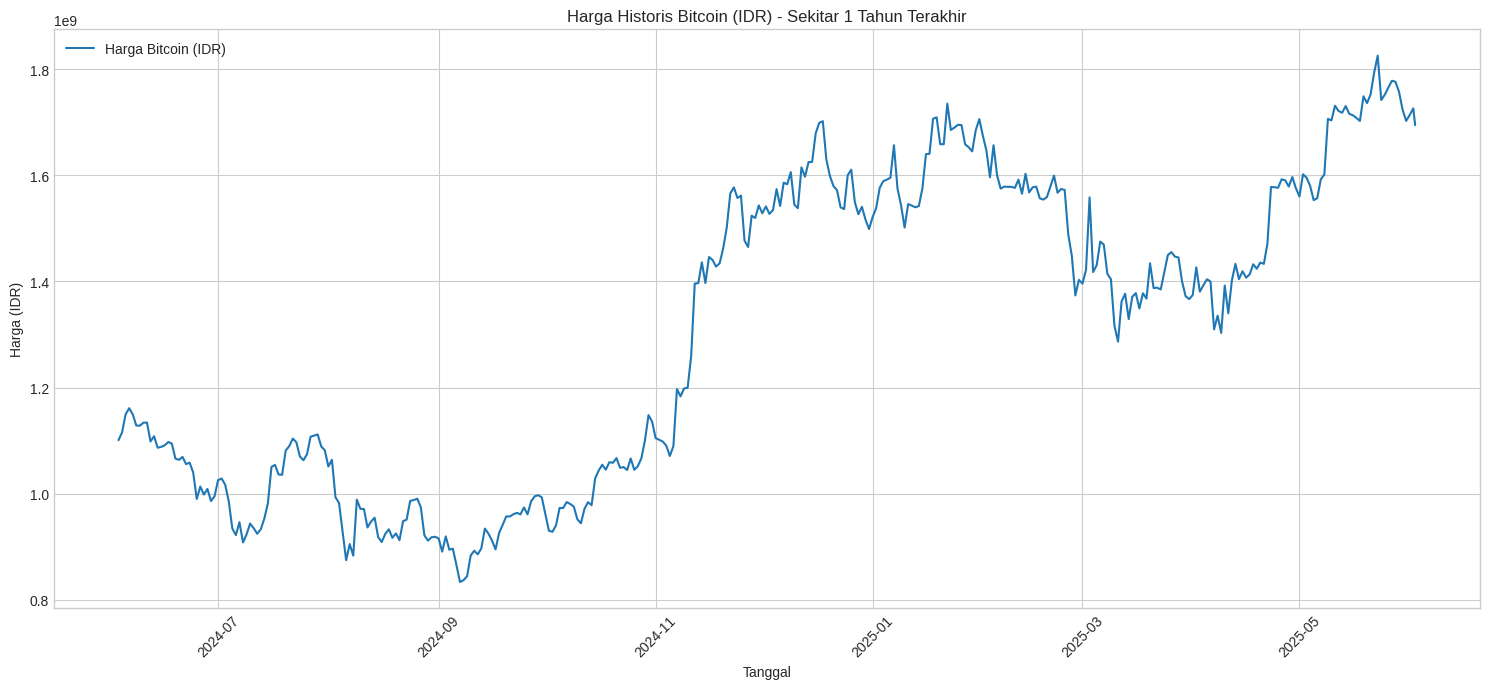


Jumlah missing values per kolom:
price    0
dtype: int64


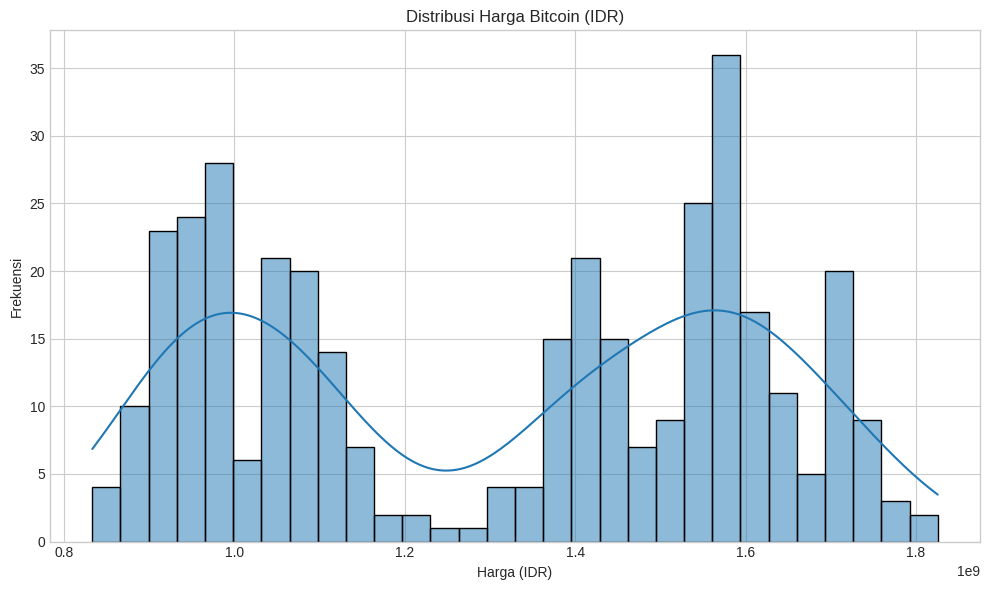

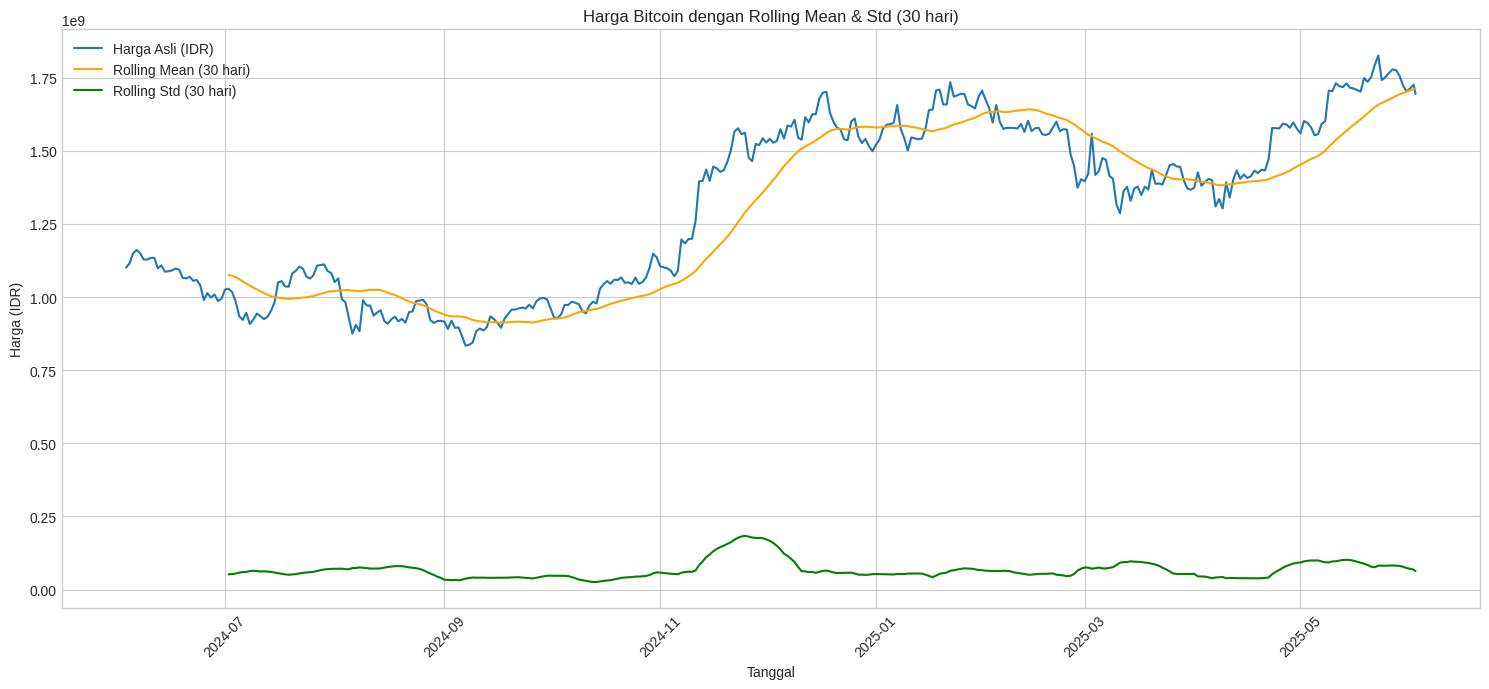

In [ ]:
# Pastikan df_raw tidak kosong sebelum EDA
if not df_raw.empty:
    # 1. Plot harga Bitcoin dari waktu ke waktu
    plt.figure(figsize=(15, 7))
    plt.plot(df_raw.index, df_raw['price'], label='Harga Bitcoin (IDR)')
    plt.title('Harga Historis Bitcoin (IDR) - Sekitar 1 Tahun Terakhir') # Judul diubah sedikit
    plt.xlabel('Tanggal')
    plt.ylabel('Harga (IDR)')
    plt.xticks(rotation=45) # Menambahkan rotasi agar label tanggal lebih mudah dibaca
    plt.legend()
    plt.tight_layout() # Menyesuaikan layout agar tidak terpotong
    plt.show()

    # 2. Cek missing values (seharusnya tidak ada dari CoinGecko untuk harga)
    print("\nJumlah missing values per kolom:")
    print(df_raw.isnull().sum())

    # 3. Plot distribusi harga (histogram)
    plt.figure(figsize=(10, 6))
    sns.histplot(df_raw['price'], kde=True, bins=30) # Jumlah bins disesuaikan sedikit
    plt.title('Distribusi Harga Bitcoin (IDR)')
    plt.xlabel('Harga (IDR)')
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

    # 4. Analisis volatilitas sederhana dengan rolling window
    #    Kita bisa plot rolling mean dan rolling standard deviation
    window_size = 30 # Jendela 30 hari
    df_eda = df_raw.copy() # Bekerja dengan salinan untuk EDA
    df_eda['rolling_mean'] = df_eda['price'].rolling(window=window_size).mean()
    df_eda['rolling_std'] = df_eda['price'].rolling(window=window_size).std()

    plt.figure(figsize=(15, 7))
    plt.plot(df_eda.index, df_eda['price'], label='Harga Asli (IDR)')
    plt.plot(df_eda.index, df_eda['rolling_mean'], label=f'Rolling Mean ({window_size} hari)', color='orange')
    plt.plot(df_eda.index, df_eda['rolling_std'], label=f'Rolling Std ({window_size} hari)', color='green')
    plt.title(f'Harga Bitcoin dengan Rolling Mean & Std ({window_size} hari)')
    plt.xlabel('Tanggal')
    plt.ylabel('Harga (IDR)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Kolom 'rolling_mean' dan 'rolling_std' ini hanya untuk EDA.
    # df_raw tetap tidak berubah.

else:
    print("EDA tidak dapat dilakukan karena DataFrame awal (df_raw) kosong.")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# Pastikan df_raw tidak kosong
if not df_raw.empty:
    df_processed = df_raw.copy() # Selalu bekerja dengan salinan data

    # 1. Penanganan Missing Values (Contoh: forward fill, jika ada)
    #    Meskipun data kita saat ini tidak ada NaN, ini adalah praktik yang baik untuk disertakan.
    initial_nans = df_processed.isnull().sum().sum()
    if initial_nans > 0:
        print(f"Menangani {initial_nans} missing values...")
        df_processed.fillna(method='ffill', inplace=True) # Isi NaN dengan nilai sebelumnya
        df_processed.fillna(method='bfill', inplace=True) # Jika ada NaN di awal, isi dengan nilai setelahnya
        if df_processed.isnull().sum().sum() == 0:
            print("Semua missing values berhasil ditangani.")
        else:
            print("Masih ada missing values setelah penanganan.")
    else:
        print("Tidak ada missing values awal untuk ditangani.")

    # 2. Feature Engineering
    #    a. Lag Features (misal, harga 1, 3, dan 7 hari lalu)
    lags = [1, 3, 7] # Anda bisa bereksperimen dengan nilai lag yang berbeda
    for lag in lags:
        df_processed[f'price_lag_{lag}'] = df_processed['price'].shift(lag)
    print(f"\nMenambahkan lag features untuk {lags} hari.")

    #    b. Rolling Mean Feature (misal, rata-rata harga 7 hari terakhir)
    rolling_window_size = 7 # Anda bisa bereksperimen dengan window size yang berbeda
    df_processed[f'price_rolling_mean_{rolling_window_size}'] = df_processed['price'].rolling(window=rolling_window_size).mean()
    print(f"Menambahkan rolling mean feature dengan window size {rolling_window_size} hari.")

    # Karena lag dan rolling mean akan menghasilkan NaN di awal, kita perlu menanganinya.
    # Cara paling mudah adalah menghapus baris yang mengandung NaN setelah feature engineering.
    rows_before_dropna = len(df_processed)
    df_processed.dropna(inplace=True)
    rows_after_dropna = len(df_processed)
    print(f"\nJumlah baris sebelum menghapus NaN hasil feature engineering: {rows_before_dropna}")
    print(f"Jumlah baris setelah menghapus NaN hasil feature engineering: {rows_after_dropna}")
    print(f"{rows_before_dropna - rows_after_dropna} baris dihapus karena mengandung NaN setelah feature engineering.")

    # 3. Normalisasi/Standarisasi Fitur
    #    Kita akan menggunakan MinMaxScaler untuk mengubah skala fitur ke rentang [0, 1]
    from sklearn.preprocessing import MinMaxScaler

    # Penting: Inisialisasi scaler di sini
    scaler = MinMaxScaler()

    # Pilih fitur yang akan dinormalisasi (semua fitur yang kita punya saat ini)
    # Kolom 'price' adalah target kita, tapi untuk beberapa model (seperti LSTM),
    # memprediksi target yang dinormalisasi bisa lebih mudah, lalu hasilnya di-inverse_transform.
    # Untuk saat ini, kita akan normalisasi semua kolom termasuk 'price'.
    features_to_scale = df_processed.columns
    df_processed[features_to_scale] = scaler.fit_transform(df_processed[features_to_scale])
    print("\nSemua fitur telah dinormalisasi menggunakan MinMaxScaler.")

    print("\nBeberapa baris awal data setelah preprocessing:")
    print(df_processed.head())

    print("\nInformasi dataset setelah preprocessing:")
    df_processed.info()

    print("\nStatistik deskriptif setelah preprocessing:")
    print(df_processed.describe())

    # df_processed sekarang adalah data yang siap untuk dilatih
    # Scaler yang sudah di-fit (scaler) juga penting untuk disimpan/dibuat ulang
    # saat inferensi untuk data baru atau untuk inverse_transform prediksi.

else:
    print("Preprocessing tidak dapat dilakukan karena DataFrame awal (df_raw) kosong.")

# (Opsional) Simpan juga dataset yang sudah diproses untuk nanti digunakan di Kriteria 2
# if 'df_processed' in locals() and not df_processed.empty:
#     # Buat nama folder jika belum ada (ini untuk lokal, di Colab hanya path)
#     # import os
#     # if not os.path.exists("../preprocessing/namadataset_preprocessing"):
#     # os.makedirs("../preprocessing/namadataset_preprocessing")
#
#     processed_csv_file_name = "bitcoin_idr_daily_processed.csv"
#     df_processed.to_csv(processed_csv_file_name) # Simpan di root Colab dulu
#     print(f"\nData yang sudah diproses disimpan sebagai {processed_csv_file_name} di environment Colab.")
#     print("Anda bisa mengunduhnya dan menempatkannya di folder 'Eksperimen_SML_Nama-Anda/preprocessing/namadataset_preprocessing/'")
#     # Target path lokal: Eksperimen_SML_Nama-Anda/preprocessing/namadataset_preprocessing/bitcoin_idr_daily_processed.csv

Tidak ada missing values awal untuk ditangani.

Menambahkan lag features untuk [1, 3, 7] hari.
Menambahkan rolling mean feature dengan window size 7 hari.

Jumlah baris sebelum menghapus NaN hasil feature engineering: 366
Jumlah baris setelah menghapus NaN hasil feature engineering: 359
7 baris dihapus karena mengandung NaN setelah feature engineering.

Semua fitur telah dinormalisasi menggunakan MinMaxScaler.

Beberapa baris awal data setelah preprocessing:
               price  price_lag_1  price_lag_3  price_lag_7  \
date                                                          
2024-06-10  0.302658     0.297067     0.318709     0.269421   
2024-06-11  0.302976     0.302658     0.297235     0.284119   
2024-06-12  0.267055     0.302976     0.297067     0.318664   
2024-06-13  0.277039     0.267055     0.302658     0.330267   
2024-06-14  0.255179     0.277039     0.302976     0.318709   

            price_rolling_mean_7  
date                              
2024-06-10              0